#**Reducción de dimensionalidad**

Es deseable reducir el número de variables de entrada para reducir el costo computacional del modelado y, en algunos casos, para mejorar el rendimiento del modelo.


Las ventajas principales son:

1. Previene el **Overfitting** (sobrajuste): un conjunto de datos de alta dimensión que tiene demasiadas características a veces puede provocar un sobreajuste (el modelo captura tanto los efectos reales como los aleatorios).
2. **Simplicidad**: un modelo demasiado complejo que tiene demasiadas características puede ser difícil de interpretar, especialmente cuando las características están correlacionadas entre sí.
3. **Eficiencia** computacional: un modelo entrenado en un conjunto de datos de menor dimensión es computacionalmente más eficiente.

**ESTRATEGIAS**

A la hora de seleccionar los datos para un algoritmo de ML pueden presentarse tres estrategias:
1. En primer lugar y la más clara sería introducir **todos los datos** una vez procesados sin reducir su dimensionalidad. Este método es apto para aquellos casos en que se tienen pocas características.
2. Reducir la dimensionalidad sin modificar los datos de entrada. Es decir, **eliminar variables** que no nos interesan.
3. **Reducir la dimensionalidad** modificando el espacio vectorial (modificando los datos del dataset).

## Mismo espacio vectorial -> Dimensionality reduction

También conocido como Feature Selection o Feture Reduction

Mismo espacio vectorial significa que no modificamos los datos de cada característica, sino que **eliminamos características**.

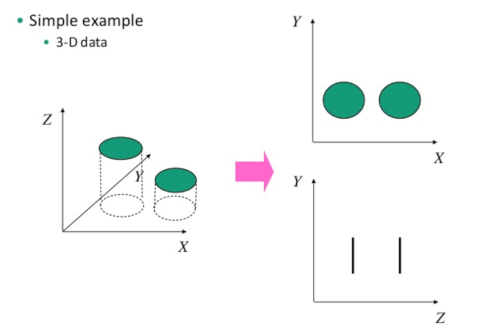

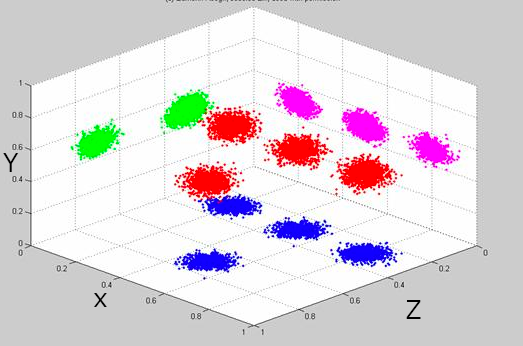

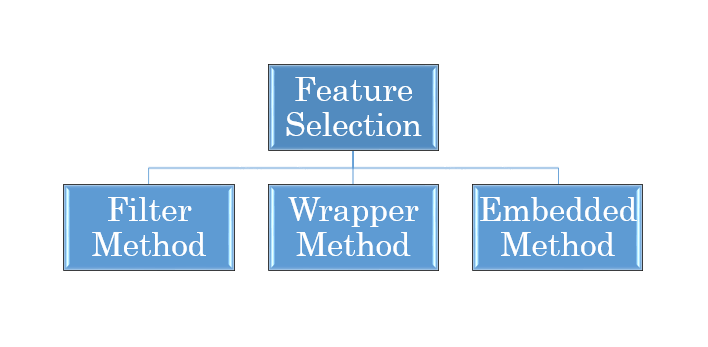

**Dataset**

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [2]:
boston = load_boston()
print("INFO:   ", boston.DESCR)

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df["MEDV"] = boston.target

INFO:    .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PT

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Separamos en un dataset los datos y en el otro el target
X = df.drop("MEDV",axis=1)   
y = df["MEDV"]          

### Método del filtrado

Existen varios:

* **Correlación**
* Prueba χ² (Chi-squared test)
* ANOVA
* Factor de inflación de la varianza (VIF)

Veremos únicamente el primero

####Método de correlación

Se aplica a variables numéricas. Hay dos tipos de correlación (que se tratan aquí):
1. Pearson: cuando dos variables tienen una relación lineal entre ellas.
2. Spearman: cuando dos variables tienen una relación monótona entre ellas.

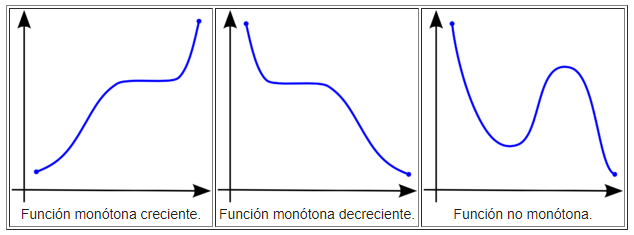

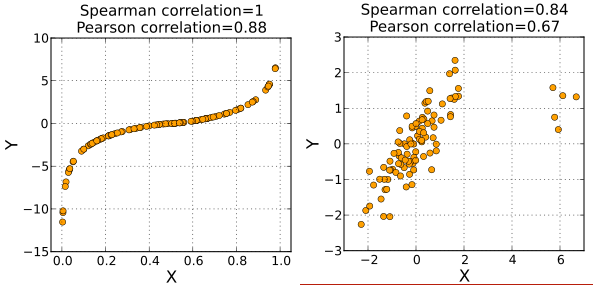

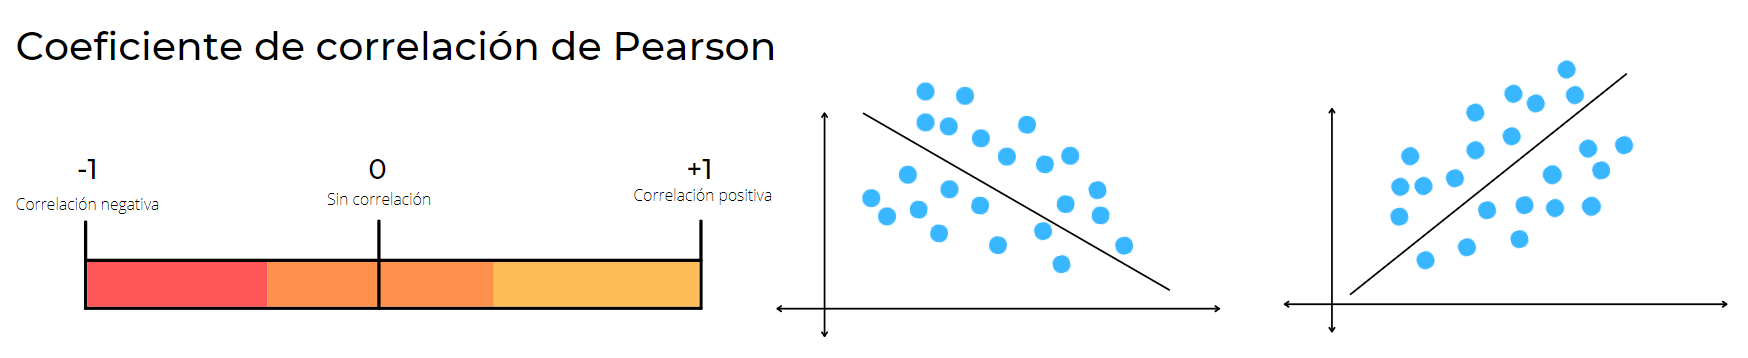

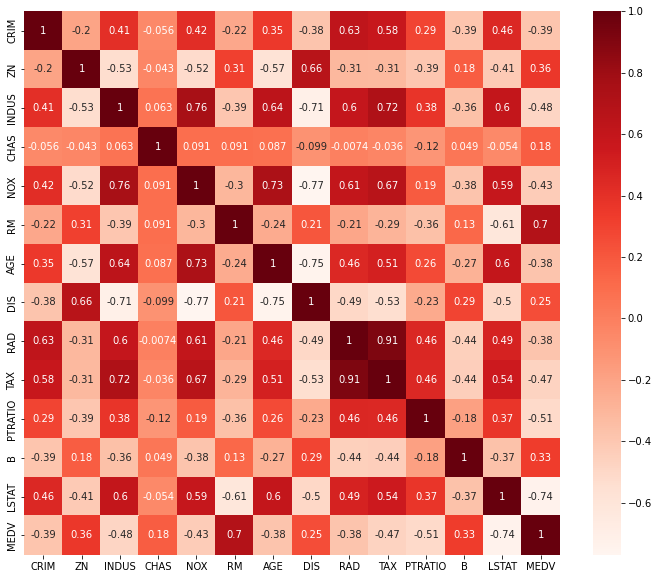

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
cor = df.corr() # Por defecto calculamos el de Pearson, para calcular Spearman -> df.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
# Correlación con la variable target
cor_target = abs(cor["MEDV"])
# ¿Cuáles son las variables que más correlacionadas están?
relevant_features = cor_target[cor_target > 0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

Nos quedaremos sólo con esas variables

In [7]:
cor_target.sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [8]:
X_3 = X[['RM','PTRATIO', 'LSTAT']]

Una de las premisas para la regresión lineal es el hecho de que las variables que usemos no han de estar correlacionadas entre ellas; en caso de que lo estén nos habremos de quedar solamente con una de ellas.

Necesitamos que no estén correlacionadas porque si lo estuvieran serían dependientes y en ese caso nos sobraría una de ellas

Es decir, hemos de hacer los mismo que en el paso anterior pero en este caso comprobar que no suceda entre ellas. Decimos que dos variables empiezan a estar correlacionadas si superan el umbral de 0.5 (sin importar el signo). En este caso decimos que la correlación entre RM y LSTAT es alta por lo que debemos deshacernos de una de las dos.

¿Con cuál de las dos nos quedamos?

Nos decantamos por aquella que tenga mayor correlación con la variable que queremos predecir.

In [9]:
print(df[["LSTAT","PTRATIO"]].corr())
print()
print(df[["RM","LSTAT"]].corr())
print()
print(df[["PTRATIO","RM"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000

             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000

          PTRATIO        RM
PTRATIO  1.000000 -0.355501
RM      -0.355501  1.000000


RM y LSTAT están bastante correlacionadas. Eliminamos RM que tiene menor correlación con MEDV

In [10]:
X_2 = X_3.drop(['RM'], axis = 1)

In [11]:
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

**Comparativa sin eliminar variables**. Comprueba con los resultados del ejercicio del tema anterior. Prueba también a eliminar o no la característica RM de la celda anterior

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print('R2:', metrics.r2_score(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

# Ejercicio tema 3 (sin normalizar)
# R2: 0.7112260057484974
# MSE: 21.517444231176903

R2: 0.5701000431811829
MSE: 32.03317656706243


In [13]:
# Con 3 variables
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print('R2:', metrics.r2_score(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

# Ejercicio tema 3 (sin normalizar)
# R2: 0.7112260057484974
# MSE: 21.517444231176903

R2: 0.650904156861472
MSE: 26.01221192212625


### Método Wrapper
 
 Más métodos: https://heartbeat.fritz.ai/hands-on-with-feature-selection-techniques-wrapper-methods-5bb6d99b1274

Este método consiste en aplicar un algoritmo de ML e iterar haciendo todas las combinaciones de variables posibles para finalmente quedarse con aquella combinación que dé mejor resultado en las métricas.

#### Backward elimination

El concepto se basa en usar todas las variables para entrenar un modelo, una vez se ha entrenado se miran las que tengan un p_valor > 0.05 y se elimina la que su valor sea máximo. Se va iterando hasta que se obtienen variables con p-valores inferior a 0.05.

[Artículo acerca del p_valor: https://www.geeksforgeeks.org/p-value-in-machine-learning/ ]

**El valor P es una medida de la probabilidad de que los datos observados hayan ocurrido por casualidad aleatoria.**
A mayor valor P, menor influencia tiene la variable en el resultado.

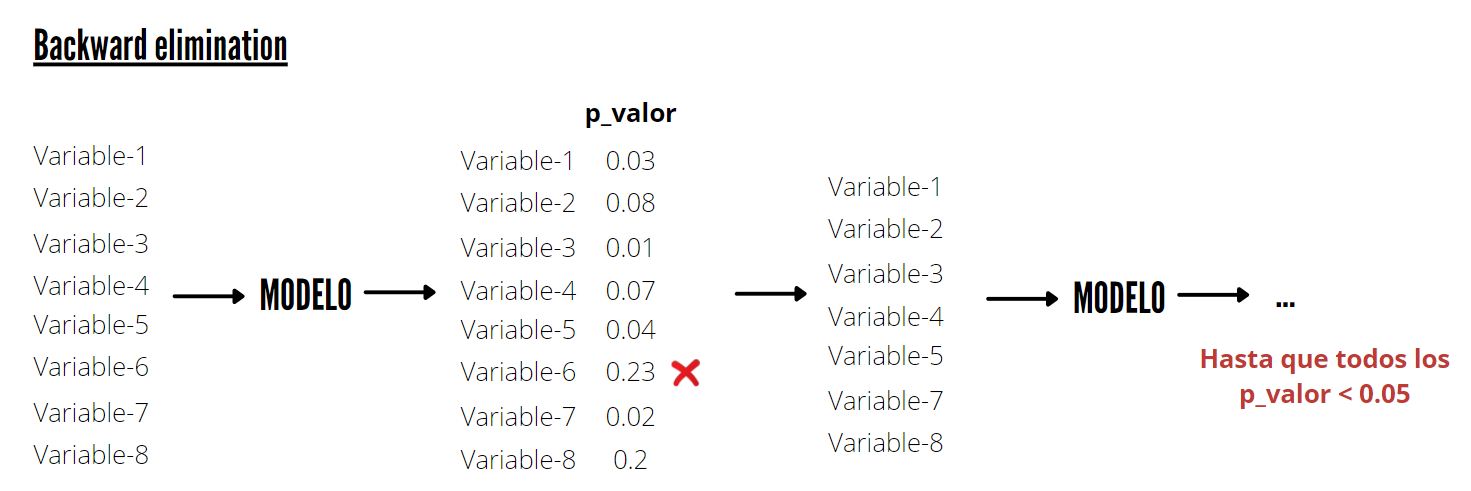

En el método de **forward elimination** en lugar de usar todas las variables de inicio se selecciona una, eligiendo la que menor p_valor tenga primero, y posteriormente la combinación de esta y otra que tengan el p_valor menor... y así sucesivamente

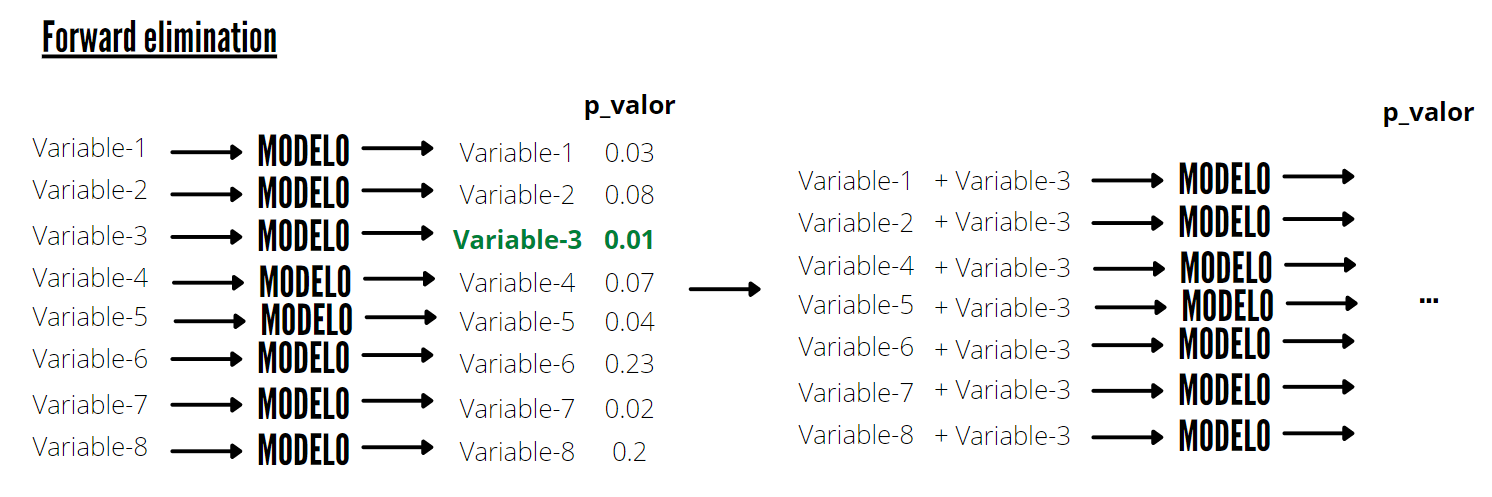

In [14]:
#Backward
import statsmodels.api as sm

X = df.drop("MEDV",axis=1)

cols = list(X.columns)
while (len(cols) > 0):
    p = []
    X_new = X[cols]
    X_new = sm.add_constant(X_new)
    # Usamos sm.OLS porque LinearRegression de sklearn no calcula p-values    
    model = sm.OLS(y, X_new).fit() 
    p = pd.Series(model.pvalues.values[1:], index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if (pmax > 0.05):
        print("removed: ", feature_with_p_max)
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_features_BE = cols
print(selected_features_BE)

removed:  AGE
removed:  INDUS
['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
X_back = df[selected_features_BE]

In [16]:
# Con Back elimination
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_back, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print('R2:', metrics.r2_score(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

# Ejercicio tema 3 (sin normalizar)
# R2: 0.7112260057484974
# MSE: 21.517444231176903

R2: 0.7149039348907338
MSE: 21.243390345509596


#### Recursive feature elimination (RFE)

Básicamente lo que hacemos con este método es ordenar aquellas columnas que sean mas importantes, es un tipo de **backward elimination** pero en lugar de usar el p_value como estimador de qué variables deben ser eliminadas se hace mediante un ranking.

Esta ponderación de **qué variables son más importantes** que otras puede venir dada por el mismo algoritmo, o por algún método estadístico.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [18]:
model = LinearRegression() 
rfe = RFE(model, n_features_to_select = 8) # Nos quedamos con las 8 mejores características

In [19]:
X = df.drop("MEDV", axis=1)

rfe.fit(X, y)
X_rfe = rfe.transform(X)
model.fit(X_rfe, y)

LinearRegression()

In [20]:
#@title Haciéndolo todo completo
from sklearn.preprocessing import StandardScaler
X = df.drop("MEDV", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

model = LinearRegression() 
rfe = RFE(model, n_features_to_select=9)
rfe.fit(X_train_std, y_train)
X_train_rfe = rfe.transform(X_train_std)
X_test_rfe = rfe.transform(X_test_std)
model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)
print(model.score(X_test_rfe, y_test))
print('R2:', metrics.r2_score(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

0.7001481595606637
R2: 0.7001481595606637
MSE: 22.342888842857082


Aplicamos el modelo de Regresión Lineal y nos devuelve: con un 1 las 8 columnas mas importantes(el numero de columnas importantes que queremos lo ponemos nosotros)

Esto solo nos sirve como *modelo inicial* ya que hemos de averiguar cuál es el número de columnas óptimo para conseguir mejor accuracy.

In [21]:
print(rfe.support_)
print(rfe.ranking_)

[ True False False False  True  True False  True  True  True  True  True
  True]
[1 3 4 2 1 1 5 1 1 1 1 1 1]


*Buscando el número de columnas óptimo*

In [22]:
from sklearn.model_selection import train_test_split

# nº de features
     
high_score = 0
# Variable para almacenar las características óptimas
nof = 0           
score_list = []
for n in range(1, len(X.columns)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=n)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe, y_test)
    score_list.append(score)
    if (score > high_score):
        high_score = score
        nof = n
print("Optimum number of features: %d" %nof)
print("Score (R2) with %d features: %f" % (nof, high_score))

Optimum number of features: 9
Score (R2) with 9 features: 0.703932


In [23]:
score_list

[0.19480719746748232,
 0.5383400514112333,
 0.5400333283802863,
 0.6010204760064424,
 0.6214376494593692,
 0.693388302224337,
 0.6864772666772768,
 0.695353182520685,
 0.7039315220756825,
 0.7001770345869645,
 0.6977655579088328,
 0.6983850039833566]

Lo que hemos conseguido con este código es aplicar un loop para averiguar cuántas columnas debemos poner. Lo hacemos probándolos todos del 1 hasta el 13 para poder saber cuál nos da una accuracy mejor. A partir de ello, y una vez encontrado el número de columnas óptimo, cambiamos el código; en lugar del 8 lo que nos ha dado es 9 como valor óptimo. Nos devuelve los 9 mejores features

In [24]:
X = df.drop("MEDV", axis=1)

cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, n_features_to_select=9) 
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)       
temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp==True].index

In [25]:
selected_features_rfe

Index(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')

Comparativa con la total selección de Features. 

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
score = reg.score(X_test, y_test)
print("Score (R2) with all the features", score)
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

Score (R2) with all the features 0.7112260057484874
MSE: 21.517444231177638


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
score = reg.score(X_test, y_test)
print("Score (R2) with all the features", score)
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

Score (R2) with all the features 0.6974092953681146
MSE: 22.54697009218391


### Métodos Embebidos (Lasso y Ridge)

Comunmente para los *embedded methods* se usan algoritmos de regularización como son Lasso y Ridge.  Estos algoritmos en su esencia lo que hacen es penalizar ciertas componentes del modelo para que no hagan *overfitting*. Por lo tanto hacen la selección de variables más importantes **durante el entrenamiento**.

(Los veremos más adelante con más detalle)

In [28]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import matplotlib.pyplot as plt

In [29]:
X = df.drop("MEDV", axis=1)

reg = LassoCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)

In [30]:
print("Lasso ha escogido " + str(sum(coef != 0)) + " variables y ha eliminado otras " +  str(sum(coef == 0)) + " variables")

Lasso ha escogido 10 variables y ha eliminado otras 3 variables


In [31]:
reg.score(X,y)

0.7024437179872696

Text(0.5, 1.0, 'Importancia de las variables usando el Modelo de Lasso')

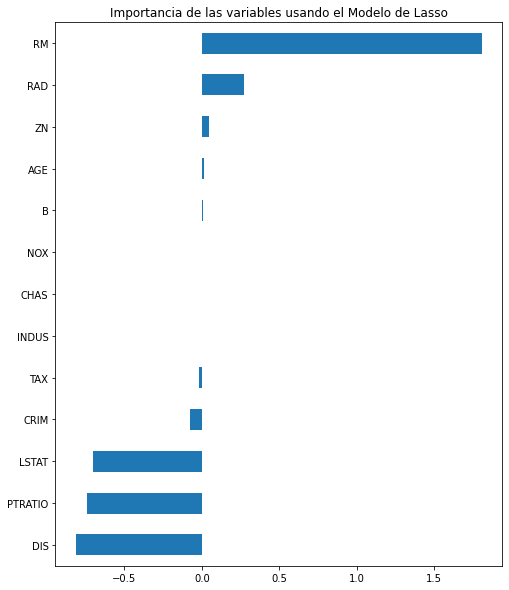

In [32]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Importancia de las variables usando el Modelo de Lasso")

**Ejercicio:**

Haz lo mismo con RidgeCV


In [33]:
''' Escribe tu código aquí '''

' Escribe tu código aquí '

Ridge ha escogido 13 variables y ha eliminado otras 0 variables
LSTAT     -3.730666
DIS       -3.077340
PTRATIO   -2.052385
NOX       -2.029010
TAX       -2.010558
CRIM      -0.919871
AGE        0.013158
INDUS      0.117385
CHAS       0.685127
B          0.848848
ZN         1.066461
RAD        2.591538
RM         2.682754
dtype: float64


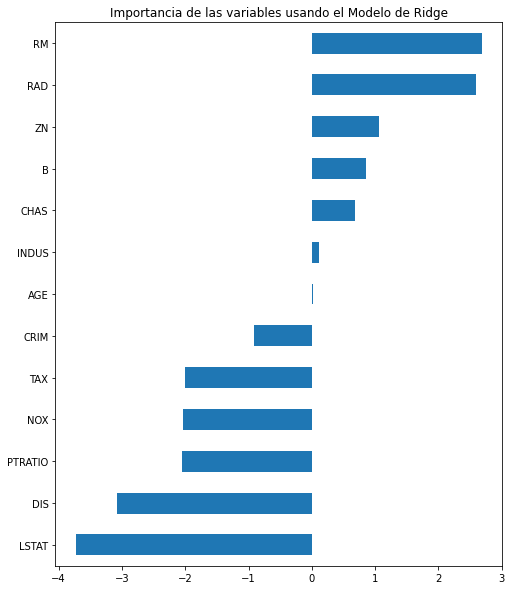

In [34]:
#@title -- Doble click para ver la solución -- { form-width: "1%" }
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X)

reg = RidgeCV(alphas=(0.1, 1.0, 10.0))
reg.fit(X_train_std, y)
coef = pd.Series(reg.coef_, index = X.columns)

print("Ridge ha escogido " + str(sum(abs(coef) != 0)) + " variables y ha eliminado otras " +  str(sum(abs(coef) == 0)) + " variables")

imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Importancia de las variables usando el Modelo de Ridge")

print(imp_coef)

In [35]:
reg.score(X_train_std,y)

0.7406304514762468

Para saber más:
**Feature selection automático**
https://danilzherebtsov.medium.com/automatic-feature-selection-in-python-f72ec69215fe



## Nuevo espacio vectorial -> Feature extraction

Nuevo espacio vectorial significa que semodifican los datos del dataset.

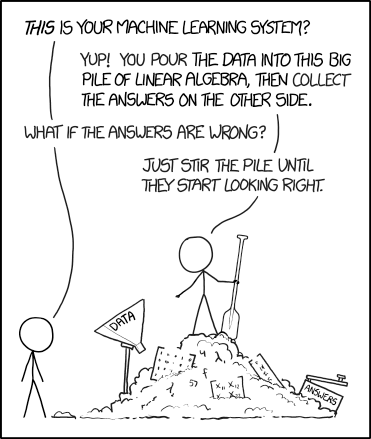

En primer lugar vamos a cargar un nuevo dataset y vamos a estandarizar los datos y dividir el dataset en train y test

In [36]:
import numpy as np
import pandas as pd
from sklearn import utils
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [37]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.DataFrame(wine.target, columns=['class'])

In [38]:
X.shape # 178 muestras y 13 columnas 

(178, 13)

In [39]:
# Creamos un dataframe agregando X e y 
df_wine = pd.concat([X, y], axis=1)


In [40]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [41]:
df_wine['class'].unique()

array([0, 1, 2])

In [42]:
df_wine.sample(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.750000,0.57,1.78,620.0,2
31,13.58,1.66,2.36,19.1,106.0,2.86,3.19,0.22,1.95,6.900000,1.09,2.88,1515.0,0
12,13.75,1.73,2.41,16.0,89.0,2.60,2.76,0.29,1.81,5.600000,1.15,2.90,1320.0,0
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.700000,0.81,1.82,580.0,2
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0,2
35,13.48,1.81,2.41,20.5,100.0,2.70,2.98,0.26,1.86,5.100000,1.04,3.47,920.0,0
34,13.51,1.80,2.65,19.0,110.0,2.35,2.53,0.29,1.54,4.200000,1.10,2.87,1095.0,0
81,12.72,1.81,2.20,18.8,86.0,2.20,2.53,0.26,1.77,3.900000,1.16,3.14,714.0,1
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.400000,0.74,1.42,530.0,2
32,13.68,1.83,2.36,17.2,104.0,2.42,2.69,0.42,1.97,3.840000,1.23,2.87,990.0,0


#### División en dataset de entrenamiento y test

In [43]:
X = df_wine.iloc[:, :-1]
y = df_wine.iloc[:, -1]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 42
)

#### Estandarización

Estandarización:

Su utilidad reside en el hecho de que si tenemos dos variables y una tiene valores entre 0 y 3000 y la otra entre 0 y 4, el modelo de dará más importancia a la primera. Depende del modelo en tanto que hay modelos que no tienen esta problemática, en sklearn por ejemplo nos lo indica cuando es obligatorio.

En este caso porque es tan importante... debido a que aplicaremos PCA vamos a ver cómo es un modelo que define sus componentes según la dirección de mayor varianza, por lo tanto no nos interesa un desajuste de las medidas.

**Debería hacerse antes de:** PCA / Clustering / KNN / SVM / LASSO / RIDGE

In [45]:
# Procesado de los datos -> en este caso simplemente estandarizamos
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Ojo: La estandarización se realiza mirando sólo los datos de train.
# Hacemos fit + transform
# Los datos de test también los normalizamos pero sólo con transform.
# Esto es para evitar que información de los datos de test pasen al modelo
# a través del ajuste de la estandarización

In [46]:
X_train_std

array([[ 0.62844732,  1.08120605, -0.65212742, ..., -0.64137827,
        -1.07090115, -0.51821917],
       [-0.54088231, -0.61299439, -1.42753372, ...,  0.34652993,
         1.33076844, -0.21506322],
       [-0.75565714, -1.28703113, -1.53830605, ...,  0.43243499,
        -0.39843366,  0.04196031],
       ...,
       [ 1.69038953, -0.48547393,  0.04943066, ...,  1.03377042,
         0.54851034,  2.66821356],
       [-0.32610748, -0.79516648, -0.39365865, ...,  0.00290969,
        -0.74152932, -0.79830892],
       [-0.74372521,  0.04282513,  0.34482354, ..., -0.6843308 ,
         1.07001574, -0.98613381]])

### PCA (Principal Component Analysis) -> Análisis de los componentes principales

#### Teoría

La idea tras este algoritmo es la siguiente:
Supongamos que tenemos una base de datos con **n** muestras (filas) y **m** variables (columnas, características de cada una de estas muestras). El objetivo de PCA es encontrar una dimensión **z** inferior a m (z<m) que permita explicar lo mismo que m, pero con menos dimensiones. Cada uno de los elementos z se le conoce como componente principal. 

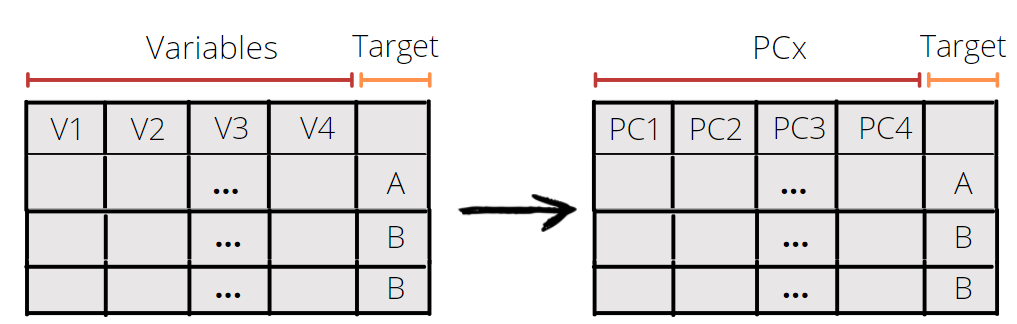

Una de las consecuencias de hacer este cambio es que **perdemos "comprensión"**. Antes conocíamos el significado de V1, por ejemplo podrían ser kg de manzanas, sin embargo ahora PC1 es una combinación de varias variables, con lo que ahora no tiene ningún significado concreto.


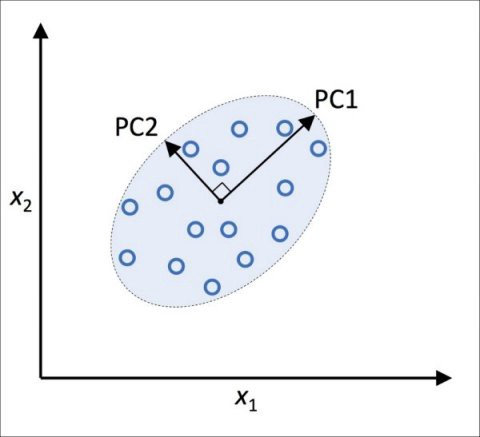

Representación animada: https://drive.google.com/open?id=12uG8y3k1-Hzzlq0qethDSrIJnH7T9PIZ&authuser=vmalonso%40gmail.com&usp=drive_fs

Aplicando la teoría matemática de manera gráfica puede entenderse de la siguiente manera. Si tenemos 15 muestras descritas por dos variables $(x_1,x_2)$, si lo graficamos nos sale el gráfico superior. En esta situación como máximo podemos tener 2 componentes principales (sin embargo no estaríamos reduciendo dimensionalidad). La componente principal 1, la más importante siempre, será aquella que se oriente en la dirección donde las observaciones varíen más. En el caso de la componente 2 será la siguiente dirección en donde varien más, sin embargo debe cumplirse una premisa entre estas dos componentes. Deben de ser ortogonales (perpendiculares)

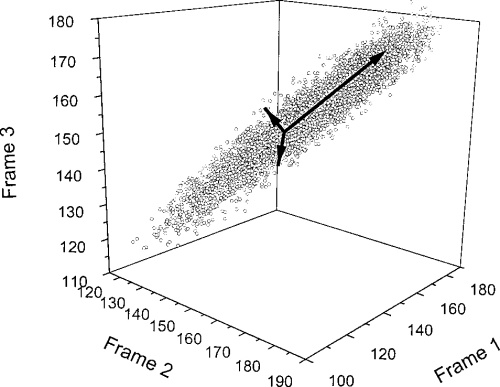

[6]

Como máximo podemos obtener tantas componentes principales como variables tenemos en la base de datos original, por lo tanto; **¿cómo reducimos la dimensionalidad?** 
Cuando se realiza un PCA normalmente se obtienen gráficos como el siguiente:

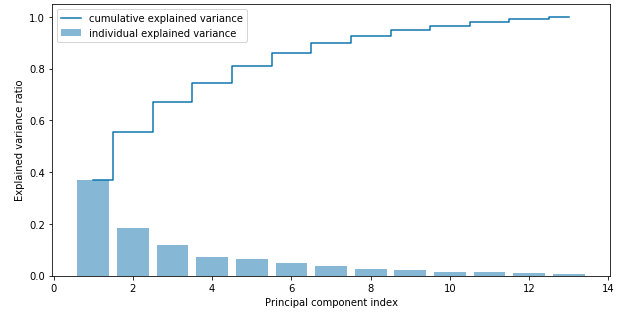

En el cual se muestra para cada una de las componentes principales el % de varianza que explican. Ante esta situación se considera a partir de un 90 % se capta la información suficiente de los datos, por lo tanto, se usarán tantas componentes necesarias como para llegar al 90%, pero sin embargo no serán tantas como si quisiéramos el 100%.

#### Ejercicio

**Dataset: Vinos**

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [48]:
# incializamos el PCA ("pre-procesado) y una regresión logística (modelo)
pca = PCA(n_components = 2)
lr = LogisticRegression(multi_class='auto', solver='liblinear') # liblinear es bueno para datasets pequeños

**Atención**

Diferencia entre fit y fit_transform: Si tenemos datos de test y train separados ->  aprenderemos los parámetros de los datos de entrenamiento mediante fit y aplicamos transform posteriormente. Los datos de test no debemos estudiarlos, sino que empleamos lo que se ha extraído con fit. Simplemente aplicamos transform.





In [49]:
# aplicamos ambos algoritmos
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

LogisticRegression(solver='liblinear')

In [50]:
lr.score(X_test_pca, y_test)

0.9814814814814815

**Tarea**: compara estos resultados con los que se obtendrían sin aplicar PCA o con diferente número de componentes principales -> ¿Qué accuracy obtenemos?

In [51]:
''' Escribe tu código aquí '''


' Escribe tu código aquí '

In [52]:
#@title Sin PCA
lr2 = LogisticRegression(multi_class='auto', solver='liblinear')
lr2.fit(X_train_std, y_train)
lr2.score(X_test_std,y_test)


0.9814814814814815

<img src="https://drive.google.com/uc?id=1uF9CBQ3isk8g4hGzw6KGTTo2r826vwvj" alt="Drawing" width="300"/>

Hemos dicho que cada una de las componentes de un PCx esta formado por una combinación de todas las variables presentes. A continuación vamos a poder ver cómo influye cada una de las variables (que peso tiene) en cada uno de los PCx encontrados.

In [53]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.36196226 0.18763862]


In [54]:
loadings = pd.DataFrame(pca.components_.T)
loadings.columns = ['PC1', 'PC2']
loadings.index = X.columns
loadings

,PC1,PC2
alcohol,0.134430,-0.495719
malic_acid,-0.256802,-0.219885
ash,-0.011346,-0.255795
alcalinity_of_ash,-0.234053,0.096304
magnesium,0.158400,-0.266165
total_phenols,0.391949,-0.063816
flavanoids,0.416076,-0.009716
nonflavanoid_phenols,-0.278713,-0.027534
proanthocyanins,0.331293,-0.007326
color_intensity,-0.113833,-0.548299


In [55]:
# @title Función gráfico ref:7
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)# plot decision regions for training set

De manera visual se pueden ver los resultados de los casos anteriores. Lo que se ha conseguido es reducir las dimensiones que teníamos a únicamente dos. Si visualizamos el gráfico podemos ver cómo cada **cuadrado** rojo (por ejemplo) corresponde a una clase, en lugar de estar representada en un plano de X dimensiones esta representada en uno de dos dimensiones. Una vez tenemos esto (sería el gráfico sin las áreas de color, únicamente las cruces, estrellas y cuadrados) se aplica el algoritmo, el cual gráficamente se visualiza como capaz de definir unas áreas en las cuales se dividen las muestras en cada una de sus clases.

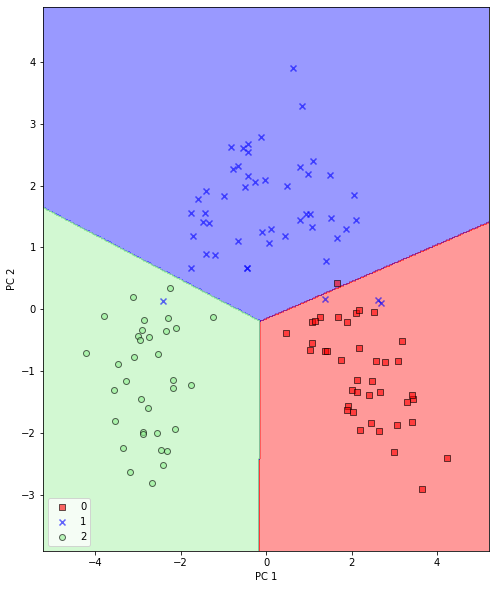

In [56]:
# train dataset
plt.figure(figsize=(8,10))
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

En el caso del test lo que se hace es a la inversa, ya tenemos las áreas de colores definidas, y sobre ellas ponemos los puntos "aplanados" usando PCA, vemos en qué región cae cada uno. Esa será la clase predicha por el modelo.

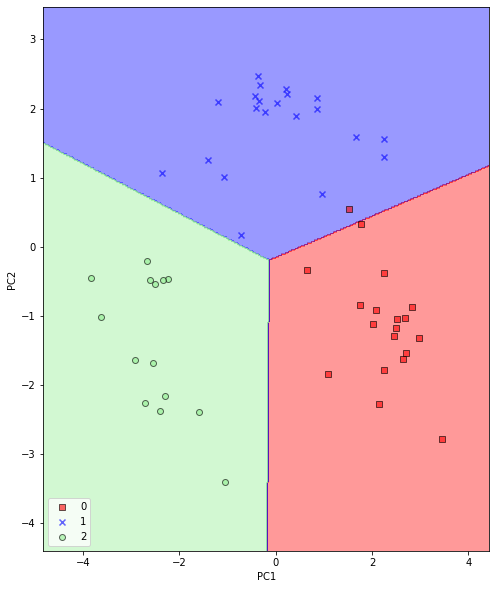

In [57]:
# test set
plt.figure(figsize=(8,10))
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

### LDA (Linear Discriminant Analysis)

#### Teoría

LDA Busca un nuevo espacio vectorial que maximice la distancia entre los elementos de las distintas clases.

Si observamos un conjunto de datos pertenecientes a dos clases en un plano de una dimensión, podemos observar la siguiente figura:

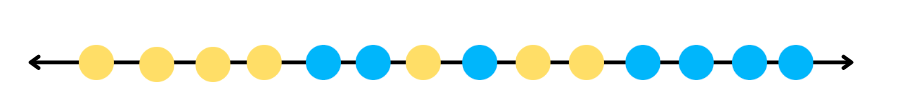

Como se observa no pueden separarse las dos clases en esta línea. Por esta razón se le añade una dimensión más (añadiendo otra variable del dataset) y de esta forma puede verse que es más sencillo de separar:

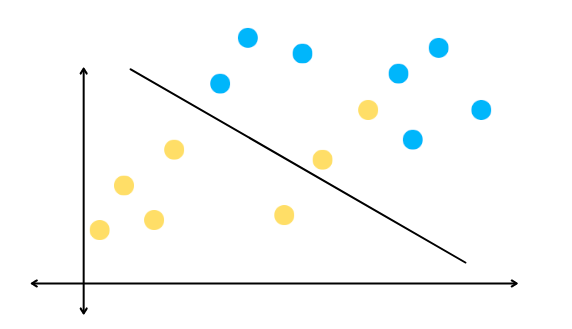

Sin embargo la clasificación no acaba de ser del todo buena, ya que tenemos elementos de la clase amarillo dentro del espacio definido como clase azul. Y además hemos incrementado la dimensionalidad. Nuestro objetivo es tener unos datos lo más puros posibles. Hacemos es lo siguiente:

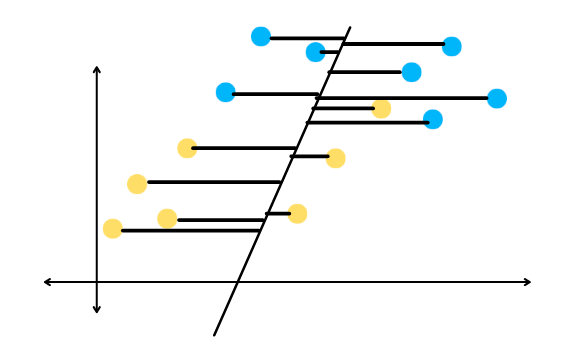

Buscamos una recta en la que, al proyectar los puntos, se consiga **maximizar la distanacia entre las medias** de los puntos de cada categoría y se **minimice la variablidad** para los puntos dentro de la misma categoría.

**Reducimos la dimensionalidad** mejorando la **clasificación** de las muestras.

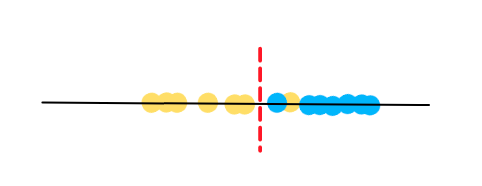

Si tenemos tres clases lo que se intenta es maximizar la distancia de cada una de ellas a un punto central. Por otra parte, en lugar de representarlo en una línea, se representa en un plano (2D) y así representándolo cada vez en una dimensión inferior.

!Atención: para poder usarlo como clasificador deberán ser los datos linealmente separables -> sino en todo caso conseguiremos una reducción de la dimensionalidad y ya se aplicará posteriormente otro algoritmo que haga la clasificación adaptándose a datos no lineales.

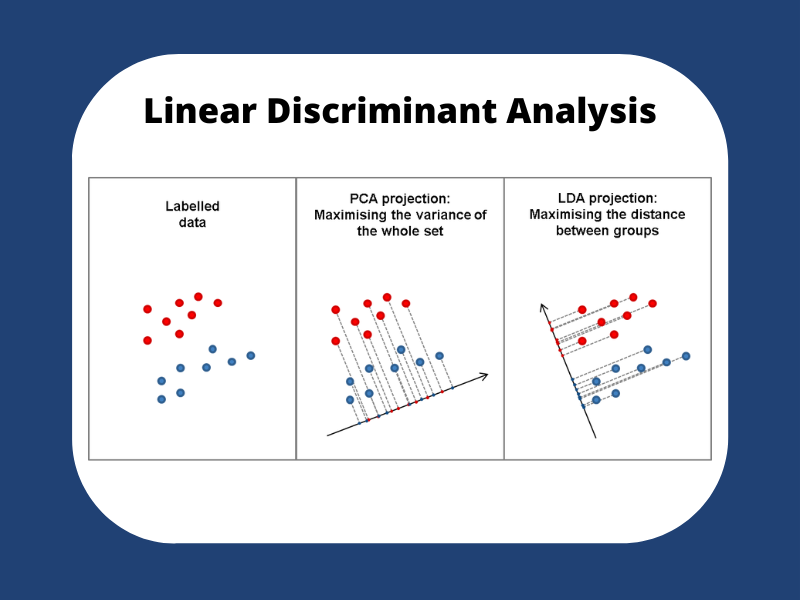

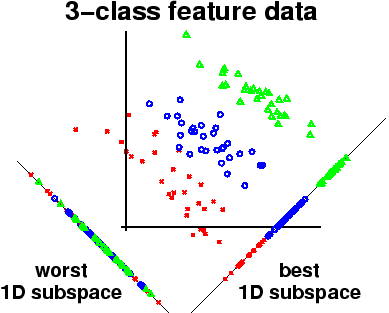

#### Ejemplo

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [59]:
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [60]:
X_test_lda = lda.transform(X_test_std)
lr_lda = LogisticRegression(multi_class='auto', solver='liblinear')
lr_lda.fit(X_train_lda, y_train)
lr_lda.score(X_test_lda, y_test)

0.9814814814814815

Las componentes son equivalentes a lo que hemos visto con PCA. Antes teníamos PCx ahora tenemos LDAx.

In [61]:
lda.explained_variance_ratio_
#sklearn definición: Percentage of variance explained by each of the selected components. If n_components is not set then all components are stored and the sum of explained variances is equal to 1.0

array([0.69340706, 0.30659294])

In [62]:
sum(lda.explained_variance_ratio_)

1.0

Comparamos con PCA

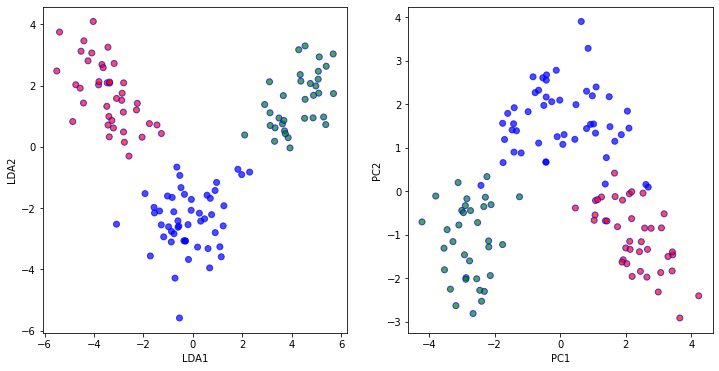

In [63]:
fig = plt.figure(figsize=(12,6))

a = []
for element in y_train:
  if element == 0:
    a.append('red')
  elif element == 1:
    a.append('blue')
  else:
    a.append('green')

axis1 = fig.add_subplot(121)
axis1.set(xlabel='LDA1', ylabel='LDA2')    
colors = ['red','green','blue']
axis1.scatter(
    X_train_lda[:,0],
    X_train_lda[:,1],
    c=a,
    alpha=0.7,
    edgecolors='b'
)

# ------------------

a = []
for element in y_train:
  if element == 0:
    a.append('red')
  elif element == 1:
    a.append('blue')
  else:
    a.append('green')

    
axis2 = fig.add_subplot(122)
axis2.set(xlabel='PC1', ylabel='PC2')  
colors = ['red','green','blue']
axis2.scatter(
    X_train_pca[:,0],
    X_train_pca[:,1],
    c=a,
    alpha=0.7,
    edgecolors='b'
)

### ¿Qué diferencia hay entre los dos? 

1. **PCA** busca la mayor **variabilidad** en los atributos de cada una de las muestras. Se puede usar para aprendizaje **no supervisado** (no tenemos target)
2. **LDA** Es capaz de maximizar la **distancia** entre cada uno de los elementos que lo conforman. No se puede utilizar en ap. no supervisado porque necesitamos un target.

# *Referencias*

[1] https://www.kaggle.com/vikrishnan/boston-house-prices

[2] https://medium.com/analytics-vidhya/feature-selection-for-dimensionality-reduction-filter-method-201cc9eaa3b5

[3] https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

[4] https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/

[5] https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2

[6] https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

[7] https://www.google.com/url?sa=i&url=https%3A%2F%2Fes.wikipedia.org%2Fwiki%2FFunci%25C3%25B3n_mon%25C3%25B3tona&psig=AOvVaw3ZS44KTnrg5ZBshKFEZ-rg&ust=1624210410913000&source=images&cd=vfe&ved=0CAsQjhxqFwoTCLDOkradpPECFQAAAAAdAAAAABAD

[8] https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

[9] https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b